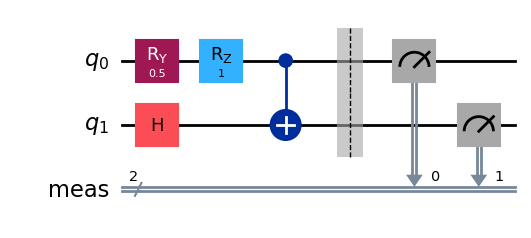

In [17]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(2)
qc.ry(0.5, 0)     # Rotació Ry sobre el qubit 0
qc.rz(1.0, 0)     # Rotació Rz sobre el qubit 0
qc.h(1)           # Porta Hadamard sobre el qubit 1
qc.cx(0, 1)       # CNOT: control 0, target 1
qc.measure_all()

# Dibuixar i guardar com imatge
qc.draw(output='mpl', filename='circuit_teo.png')  # necessita matplotlib

Resultat esperat (ideal): {'11': 516, '00': 508}


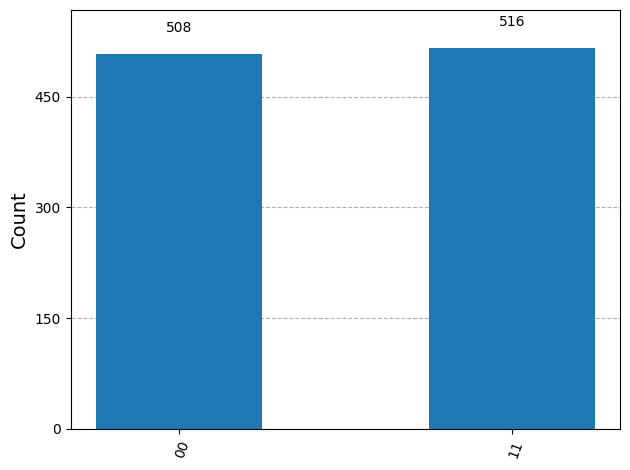

In [5]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import Sampler, Session
from qiskit.visualization import plot_histogram

# Crear el circuit de Bell
qc = QuantumCircuit(2, 2)
qc.h(0)  # Porta Hadamard sobre el primer qubit
qc.cx(0, 1)  # Porta CNOT (control = 0, destí = 1)
qc.measure([0, 1], [0, 1])  # Mesura els dos qubits

# Configuració del simulador ideal
simulator = AerSimulator()

# Simulació del circuit
job = simulator.run(qc, shots=1024)
result = job.result()
counts = result.get_counts()

# Mostrar el resultat
print("Resultat esperat (ideal):", counts)  # Esperat {'00': 0.5, '11': 0.5}

# Visualitzar la distribució dels resultats
hist = plot_histogram(counts)

# Guardar la figura com a PNG
hist.savefig("sampler_bell_histogram.png", dpi=300, bbox_inches='tight')


In [7]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import Estimator, Session
from qiskit.quantum_info import Pauli
from qiskit_aer import AerSimulator

# Crear el circuit de Bell
qc = QuantumCircuit(2, 2)
qc.h(0)  # Porta Hadamard sobre el primer qubit
qc.cx(0, 1)  # Porta CNOT (control = 0, destí = 1)

# Definir l'observable ZZ
observable = Pauli('ZZ')
backend = AerSimulator()

# Crear un Estimator
estimator = Estimator(mode=backend)

# Passar el circuit i l'observable en una llista
result = estimator.run([(qc, observable)]).result()[0]


# Obtenir el valor esperat de l'observable
expected_value = result.data.evs
print("Valor esperat de l'observable ZZ:", expected_value)  # Esperat: 1.0


Valor esperat de l'observable ZZ: 1.0


In [13]:
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Kraus, SuperOp
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Import from Qiskit Aer noise module
from qiskit_aer.noise import (NoiseModel, QuantumError, ReadoutError,
    pauli_error, depolarizing_error, thermal_relaxation_error)

# Example error probabilities
p_reset = 0.005
p_meas = 0.01
p_gate1 = 0.01


# QuantumError objects
error_reset = pauli_error([('X', p_reset), ('I', 1 - p_reset)])
error_meas = pauli_error([('X',p_meas), ('I', 1 - p_meas)])
error_gate1 = pauli_error([('X',p_gate1), ('I', 1 - p_gate1)])
error_gate2 = error_gate1.tensor(error_gate1)

# Add errors to noise model
noise_bit_flip = NoiseModel()
noise_bit_flip.add_all_qubit_quantum_error(error_reset, "reset")
noise_bit_flip.add_all_qubit_quantum_error(error_meas, "measure")
noise_bit_flip.add_all_qubit_quantum_error(error_gate1, ["u1", "u2", "u3"])
noise_bit_flip.add_all_qubit_quantum_error(error_gate2, ["cx"])

print(noise_bit_flip)

NoiseModel:
  Basis gates: ['cx', 'id', 'rz', 'sx', 'u1', 'u2', 'u3']
  Instructions with noise: ['measure', 'u2', 'u3', 'cx', 'u1', 'reset']
  All-qubits errors: ['reset', 'measure', 'u1', 'u2', 'u3', 'cx']


In [14]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import Estimator, Session
from qiskit.quantum_info import Pauli
from qiskit_aer import AerSimulator

# Crear el circuit de Bell
qc = QuantumCircuit(2, 2)
qc.h(0)  # Porta Hadamard sobre el primer qubit
qc.cx(0, 1)  # Porta CNOT (control = 0, destí = 1)

# Definir l'observable ZZ
observable = Pauli('ZZ')
backend = AerSimulator(noise_model=noise_bit_flip)

# Crear un Estimator
estimator = Estimator(mode=backend)

# Passar el circuit i l'observable en una llista
result = estimator.run([(qc, observable)]).result()[0]


# Obtenir el valor esperat de l'observable
expected_value = result.data.evs
print("Valor esperat de l'observable ZZ:", expected_value)  # Esperat: 1.0

Valor esperat de l'observable ZZ: 0.9228515625
